In [131]:
%matplotlib inline

import os

from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

plt.style.use('ggplot')

GCMG

In [134]:
S = 2
M = 4
P = 16
EPS = 0.01

N_MINORITIES = 0

N_PRODUCERS = 1200
N_SPECULATORS = 1001

N_PRODUCERS = 1000
N_SPECULATORS = 501

N_AGENTS = N_MINORITIES + N_PRODUCERS + N_SPECULATORS

N_ITERS = 50000
N_RUNS = 1

## price distribution (S=2, M=8, N=101)

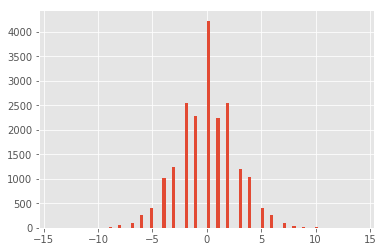

In [135]:
DIR = "../results/s{}_p{}_eps{:.2f}_nmins{}_npros{}_nspes{}_niters{}_nruns{}/".format(
    S, P, EPS, N_MINORITIES, N_PRODUCERS, N_SPECULATORS, N_ITERS, N_RUNS)

path = os.path.join(DIR, 'excess_demand_0.csv')

data = np.fromstring(open(path).read().strip(), sep=',').astype('int32')

data = data[30000:]

plt.hist(data, bins='auto')

plt.show()

## Price return distribution (cumulative)

(1e-06, 1)

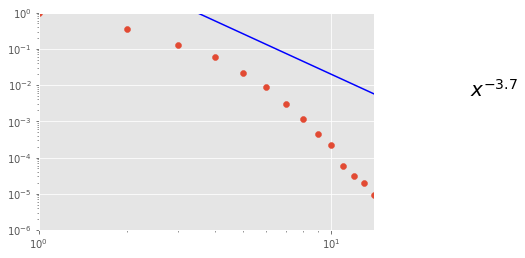

In [112]:
# S = 2
# M = 4
# EPS = 0.01

# N_MINORITIES = 0

# N_PRODUCERS = 1200
# N_SPECULATORS = 1001

# N_AGENTS = N_MINORITIES + N_PRODUCERS + N_SPECULATORS

# N_ITERS = 50000
# N_RUNS = 5

DIR = "../results/s{}_m{}_eps{:.2f}_nmins{}_npros{}_nspes{}_niters{}_nruns{}/".format(
    S, M, EPS, N_MINORITIES, N_PRODUCERS, N_SPECULATORS, N_ITERS, N_RUNS)

path = os.path.join(DIR, 'excess_demand_0.csv')

excess_demands = np.fromstring(open(path).read().strip(), sep=',').astype('int32')
excess_demands = excess_demands[30000:]

x_max = np.max(excess_demands)

positive_return = np.sort(np.array([elem for elem in excess_demands if elem > 0]))
# negative_return = np.array([elem for elem in excess_demands if elem < 0])

xs = np.linspace(1, x_max, x_max, dtype='int32')
counts, _ = np.histogram(positive_return, bins=xs.tolist() + [x_max + 1])
ys = []
summ = np.sum(counts)
for i in range(len(counts)):
    prob = np.sum(counts[i:]) / summ
    ys.append(prob)
    
ys = np.array(ys)

ys = ys / xs # Divided by return

plt.scatter(xs, ys)

# Powerlaw fitting
ws = np.float_power(xs, -3.7) * 100
plt.plot(xs, ws, c='blue')

plt.text(10 * 3, 1e-2 * 0.5, r'$x^{-3.7}$', fontsize=20)

plt.xscale('log')
plt.yscale('log')

plt.xlim(1, x_max)
plt.ylim(1e-6, 1)

In [100]:
np.max(xs), np.min(xs)

(698, 1)

## Volatility clustering

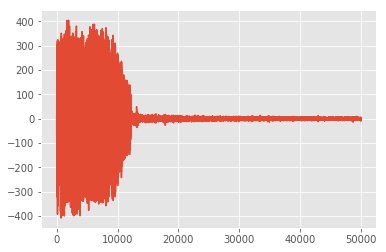

In [120]:
excess_demands_path = os.path.join(DIR, 'excess_demand_0.csv')
buys_path = os.path.join(DIR, 'buys_0.csv')
sells_path = os.path.join(DIR, 'sells_0.csv')
attendance_path = os.path.join(DIR, 'attendance_0.csv')

excess_demands = np.fromstring(open(excess_demands_path).read().strip(), sep=',').astype('float32')
buys = np.fromstring(open(buys_path).read().strip(), sep=',').astype('float32')
sells = np.fromstring(open(sells_path).read().strip(), sep=',').astype('float32')
attendance = np.fromstring(open(attendance_path).read().strip(), sep=',').astype('float32')

r = excess_demands
# r = r[30000:]

plt.plot(r)

## Autocorrelation in absolute returns

In [107]:
def compute_autocorrelation(x, tau):
    x_tau = x[tau:]
    
    x1 = np.abs(x_tau)
    x2 = np.abs(x[:-tau])
    
    corr, _ = stats.pearsonr(x1, x2)
    return corr

100%|██████████| 1/1 [00:00<00:00,  2.69it/s]


(1e-05, 1)

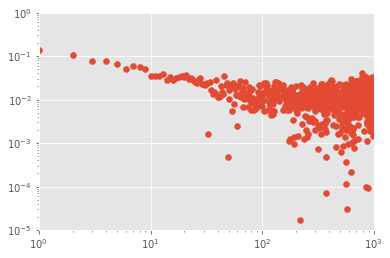

In [130]:
DIR = "../results/s{}_m{}_eps{:.2f}_nmins{}_npros{}_nspes{}_niters{}_nruns{}/".format(
    S, M, EPS, N_MINORITIES, N_PRODUCERS, N_SPECULATORS, N_ITERS, N_RUNS)

corrs = np.zeros((N_RUNS, 1000))
taus = np.arange(1, 1001)

for run in tqdm(range(N_RUNS)):
    path = os.path.join(DIR, 'excess_demand_{}.csv'.format(run))
    excess_demands = np.fromstring(open(path).read().strip(), sep=',').astype('int32')
    excess_demands = excess_demands[30000:]
    r = excess_demands

    _corrs = []
    for tau in taus:
        corr = compute_autocorrelation(r, tau)
        _corrs.append(corr)
    
    _corrs = np.array(_corrs)
    
    corrs[run] = _corrs

corrs = np.mean(corrs, 0)

plt.scatter(taus, corrs)

plt.xscale('log')
plt.yscale('log')

# xs = taus
# ws = np.float_power(xs, -0.1)

# plt.plot(xs, ws, c='blue')

plt.xlim(1, 1e+3)
plt.ylim(1e-5, 1)

In [ ]:
path = os.path.join(DIR, 'excess_demand_0.csv')

excess_demands = np.fromstring(open(path).read().strip(), sep=',').astype('int32')

plt.plot(excess_demands[30000:])

(1e-05, 1)

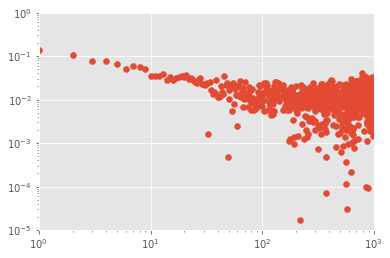

In [136]:
# S = 2
# M = 4
# EPS = 0.01

# N_MINORITIES = 0

# N_PRODUCERS = 1000
# N_SPECULATORS = 501
# N_PRODUCERS = 1200
# N_SPECULATORS = 1001

# N_AGENTS = N_MINORITIES + N_PRODUCERS + N_SPECULATORS

# N_ITERS = 50000
# N_RUNS = 10

DIR = "../results/s{}_p{}_eps{:.2f}_nmins{}_npros{}_nspes{}_niters{}_nruns{}/".format(
    S, P, EPS, N_MINORITIES, N_PRODUCERS, N_SPECULATORS, N_ITERS, N_RUNS)

path = os.path.join(DIR, 'excess_demand_0.csv')

excess_demands = np.fromstring(open(path).read().strip(), sep=',').astype('int32')
excess_demands = excess_demands[30000:]
r = excess_demands

corrs = []
taus = []
for tau in range(1, 1001):
    r_tau = r[tau:]
    
    x1 = np.abs(r_tau)
    x2 = np.abs(r[:-tau])
    
    corr, _ = stats.pearsonr(x1, x2)
    corrs.append(corr)
    taus.append(tau)

plt.scatter(taus, corrs)

plt.xscale('log')
plt.yscale('log')

# xs = taus
# ws = np.float_power(xs, -0.3) * 0.1

# plt.text(10 * 4, 1e-1, r'$x^{-0.3}$', fontsize=20)

# plt.plot(xs, ws, c='blue')

plt.xlim(1, 1e+3)
plt.ylim(1e-5, 1)